# Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.    
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.
    
https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/

# Data
We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.
 
    Variable                       Description
    Item_Identifier                Unique product ID
    Item_Weight                    Weight of product
    Item_Fat_Content               Whether the product is low fat or not
    Item_Visibility                The % of total display area of all products in a store allocated to the particular                                    product
    Item_Type                      The category to which the product belongs
    Item_MRP                       Maximum Retail Price (list price) of the product
    Outlet_Identifier              Unique store ID
    Outlet_Establishment_Year      The year in which store was established
    Outlet_Size                    The size of the store in terms of ground area covered
    Outlet_Location_Type           The type of city in which the store is located
    Outlet_Type                    Whether the outlet is just a grocery store or some sort of supermarket
    Item_Outlet_Sales              Sales of the product in the particulat store. This is the outcome variable to be                                      predicted.

# Evaluation Metric:
Your model performance will be evaluated on the basis of your prediction of the sales for the test data (test.csv), which contains similar data-points as train except for the sales to be predicted. Your submission needs to be in the format as shown in "SampleSubmission.csv".
We at our end, have the actual sales for the test dataset, against which your predictions will be evaluated. We will use the Root Mean Square Error value to judge your response.

# Exploratory Data Analysis.

Probably the most crucial step in the game. I always prefer to do the EDA on the complete dataset. So if you have been given training and test dataset seperately, i would highly recommend combining it and then doing EDA on it. Things you will do here are:
1. Look at the summary of data and get a feel for it.
2. Missing data treatment
3. Outlier detection and treatment
4. Cleaning data like in the dataset some Item_Fat_Content are listed as "Low Fat" and some as "LF". They both mean the same thing and needs to be corrected before any analysis.
5. Feature engineering like creating new features or factoring existing ones.

Once we are done with this seperate training and test datasets to performing statistical modelling.

So lets gets started.


In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

#Importing datasets
train= pd.read_csv("train.csv")
test= pd.read_csv("test.csv")


In [2]:
#Lets check if there is any discrepency in the columns between our test and training dataset
train.columns.equals(test.columns)

False

In [3]:
# Lets see which are columns are different 
train.columns.difference(test.columns)

Index(['Item_Outlet_Sales'], dtype='object')

In [4]:
# So we have only 1 columns that is not there in test dataset which is our response variable. So we are good here.
# Next i will combine training and test datasets so that i can do my EDA on that but before that i need to make sure that 
# number of columns are equal in both datasets. So i will add a "Item_Outlet_Sales" column in test dataset with 0 as its value.

test['Item_Outlet_Sales']=0

#Now if you check for difference you will see have same columns in both dataset.
train.columns.difference(test.columns)


Index([], dtype='object')

In [5]:
alldata = pd.concat([train,test])
#check if the concat went well
alldata.shape 
alldata.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
#Ok we have the dataset ready to start exploring each feature of it. Lets look at all the columns and pick one by one
alldata.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
# Check data types of columns 
alldata.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
# Count Number of Nulls (Missing Values)
alldata.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
alldata['Item_Fat_Content'].describe()
#From the output below derive following inferences
#1. There are no missing value on this column since it has 14204 data elements which matches with the number of rows in the dataset
#2. There are 5 unique levels for this columns. 
#3. Low Fat has the highest frequency in the data

count       14204
unique          5
top       Low Fat
freq         8485
Name: Item_Fat_Content, dtype: object

In [10]:
#Next i will check the unique levels of this columns
alldata['Item_Fat_Content'].unique()
# Ahh haa something doesn't look right from the unique levels output. 
# Low Fat, low fat, LF --> They are same except are written differently. This needs to be fixed along with 'Regular' and 'reg'

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [11]:
alldata.Item_Fat_Content.replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg':'Regular'}, inplace=True)
#Lets confirm if we have fixed the problem
alldata['Item_Fat_Content'].unique()
#We have only 2 levels now which looks good

array(['Low Fat', 'Regular'], dtype=object)

In [12]:
alldata['Item_Fat_Content'].value_counts()
# We have 9185 items with low fat content and 5019 items with regular fat content

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

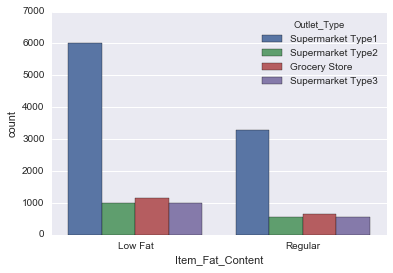

In [13]:
# Run this if seaborn is already not installed else ignore
#!pip install seaborn 

import seaborn as sns

%matplotlib inline 
import matplotlib.pyplot as plt

sns.countplot(x="Item_Fat_Content", hue="Outlet_Type", data=alldata);
#Visualizing data is critical as it helps in creating and validating hypothesis
#Inferences from the below visualization:
#1. Supermarket Type 1 sells the most low fat products. 

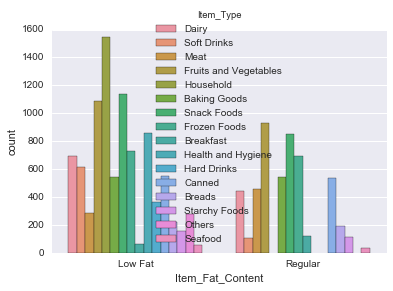

In [14]:
import seaborn as sns
%matplotlib inline 
sns.countplot(x="Item_Fat_Content",  hue="Item_Type", data=alldata);

In [15]:
#Next look at 'Item_Identifier' feature
alldata['Item_Identifier'].describe()

#Inferences drawn:
#1. There are no missing values
#2. 1559 unique identifiers in the data
#3. FDX47 has the most occurances with 10.

# My intuition says that this columns won't be much of a use when i do my prediction model, i will drop it later 
# when i will create my prediction model.

#del alldata['Item_Identifier']

count     14204
unique     1559
top       FDS08
freq         10
Name: Item_Identifier, dtype: object

In [16]:
alldata['Item_MRP'].describe()

count    14204.000000
mean       141.004977
std         62.086938
min         31.290000
25%         94.012000
50%        142.247000
75%        185.855600
max        266.888400
Name: Item_MRP, dtype: float64

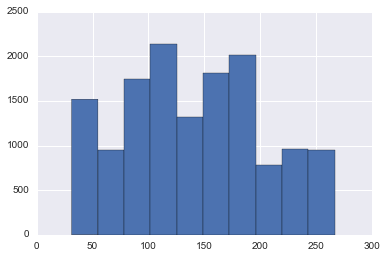

In [17]:
alldata['Item_MRP'].hist()
#Inferences
#1. Data looks normally distributed. Don't have to worry about skewness
#. There are no missing data as well

In [18]:
alldata['Item_Type'].describe()

count                     14204
unique                       16
top       Fruits and Vegetables
freq                       2013
Name: Item_Type, dtype: object

In [19]:
alldata['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [20]:
alldata['Item_Type'].unique()
#Some of the things we can do here is to combine similar item types. Like Seafood and meat products can be clubbed into 
#1 item type. But for my analysis i have decided to leave it as is. There are 16 unique item types with 0 missing values

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [21]:
alldata['Item_Visibility'].describe()
#From the summary below one thing that strikes me is can the visibility be 0 as the minimum value is 0. 
#This is something i have decided to fix in next step.

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

In [22]:
#First i am going to group by item itentifier and take its mean
ItemwiseMeanVisibility=alldata.groupby("Item_Identifier").Item_Visibility.mean()
#Find all records with 0 visibility
mask = alldata["Item_Visibility"] == 0
#Fill 0's with mean visibility 
alldata.loc[mask, "Item_Visibility"] = ItemwiseMeanVisibility[alldata.loc[mask, "Item_Identifier"]].values


In [23]:
#Checking the item visibility again and now the minimum value is no longer 0 and the distribution looks still the same
alldata['Item_Visibility'].describe()

count    14204.000000
mean         0.069710
std          0.049728
min          0.003575
25%          0.031145
50%          0.057194
75%          0.096930
max          0.328391
Name: Item_Visibility, dtype: float64

In [24]:
alldata['Item_Weight'].isnull().sum()
#There are 2439 records were Item_weight is missing. This needs to be fixed.

2439

In [25]:
#Take the mean of Item_Weight by Item_Identifier
itemizedWeightsByIdentifier=alldata.groupby("Item_Identifier").Item_Weight.mean()
#Find out all the rows with null value 
mask = alldata["Item_Weight"].isnull()
#Fill null with average weight of that Item_Identifier
alldata.loc[mask, "Item_Weight"] = itemizedWeightsByIdentifier[alldata.loc[mask, "Item_Identifier"]].values
#Check if we have fixed the missing values
alldata['Item_Weight'].isnull().sum()

0

In [26]:
alldata.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [27]:
#Next we have Outlet_Establishment_Year. Lets look at this feature
alldata['Outlet_Establishment_Year'].describe()
# while the data below looks ok but to a computer a value like 1985 is just a number wil no meaning
# whereas to us it has a meaning we can say that if something was started in 1985 then its 31 yrs old.
# Hence i will be replacing Outlet_Establishment_Year with OutletAge

count    14204.000000
mean      1997.830681
std          8.371664
min       1985.000000
25%       1987.000000
50%       1999.000000
75%       2004.000000
max       2009.000000
Name: Outlet_Establishment_Year, dtype: float64

In [28]:
alldata['Outlet_Establishment_Year'] = 2016-alldata['Outlet_Establishment_Year']

In [29]:
alldata['Outlet_Identifier'].isnull().sum()
# There are no mkssing data in this feature.
# I have decided to use thios feature as is.

0

In [30]:
alldata['Outlet_Location_Type'].head(5)
# This feature looks good as well. So no feature engineering here.

0    Tier 1
1    Tier 3
2    Tier 1
3    Tier 3
4    Tier 3
Name: Outlet_Location_Type, dtype: object

In [31]:
#Lets look at Outlet_Size feature. Its of type object so i look at how many unique values it has.
alldata['Outlet_Size'].unique()
# From below i can say that it has missing values along with 3 levels which are Small, Medium and High

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [32]:
# Lets look at the frequency of each level 
alldata.Outlet_Size.value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [33]:
#Number of mising values in Outlet_Size. There are 4016 rows with missing data. We need to fix this
alldata.Outlet_Size.isnull().value_counts()

False    10188
True      4016
Name: Outlet_Size, dtype: int64

In [34]:
alldata.groupby('Outlet_Size').Outlet_Type.value_counts()

Outlet_Size  Outlet_Type      
High         Supermarket Type1    1553
Medium       Supermarket Type3    1559
             Supermarket Type1    1550
             Supermarket Type2    1546
Small        Supermarket Type1    3100
             Grocery Store         880
Name: Outlet_Type, dtype: int64

In [35]:
pd.crosstab(alldata['Outlet_Size'], alldata['Outlet_Type'], dropna=False, margins=True)
# Inference from below output.

#1. If the Outlet_Type is Grocery Store then the Outlet_Size is only Small. So we can impute the missing values
#as Small if the Outlet_Type is Grocery Store
#2. Similar assumption cant be made about Superarket Type1 because it has a mix of all 3 outlet sizes. 

#So impute Small as the Outlet_Size if the Outlet_Type is Grocery Store

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,All
Outlet_Size,,,,,
High,0,1553,0,0,1553
Medium,0,1550,1546,1559,4655
Small,880,3100,0,0,3980
All,1805,9294,1546,1559,14204


In [36]:
alldata.loc[alldata.Outlet_Type=='Grocery Store','Outlet_Size'] = 'Small'

In [37]:
#check if the Outlet_Size data is fixed when Outlet_Type is Grocery Store. Output below looks we have fixed part of the problem.
pd.crosstab(alldata['Outlet_Size'], alldata['Outlet_Type'], dropna=False, margins=True)

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,All
Outlet_Size,,,,,
High,0,1553,0,0,1553
Medium,0,1550,1546,1559,4655
Small,1805,3100,0,0,4905
All,1805,9294,1546,1559,14204


In [38]:
# Lets see how to fix rest of the Outlet_Size data
pd.crosstab(alldata['Outlet_Size'], alldata['Outlet_Location_Type'], dropna=False, margins=True)
#Inference
#Now we are looking at frquency of outlet size by outlet location type and notice that Tier 2 location type has missing values
# for outlet size and in Tier 2 all the outlets are of Small size. 
# Hence we can assume that the rest will be of Small size as well

Outlet_Location_Type,Tier 1,Tier 2,Tier 3,All
Outlet_Size,,,,
High,0,0,1553,1553
Medium,1550,0,3105,4655
Small,2430,1550,925,4905
All,3980,4641,5583,14204


In [39]:
alldata.loc[alldata.Outlet_Location_Type=='Tier 2','Outlet_Size'] = 'Small'

In [40]:
#Lets check if we have any more missing data in Outlet size column
alldata['Outlet_Size'].unique()
#From the output we can say we are good with this column as there are no nas

array(['Medium', 'Small', 'High'], dtype=object)

In [41]:
# Next up is Outlet_Type
alldata['Outlet_Type'].unique()
# Looking at the unique values we can say that there are no missing values
# I am going to use the feature as is.

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

# Creating new features

So far we have done a lot of missing data imputation and cleaning of data but we haven't created any new feature of our own. This is a crucial step and lot of it depends on your domain expertise.

While i am not an expert in Retail but one thing that comes intutively is a #volume feature. A Grocery store would have a low volume as compared to a Supermarket Type 3 which would be like the walmart's of this world with very high volume.

I am going to create this feature with values high, mid and low depending upon the type of outlet which i have in my dataset as outlet_type.

In [42]:
alldata['volume'] = 'low'
alldata.loc[alldata.Outlet_Type=='Grocery Store','volume'] = 'low'
alldata.loc[alldata.Outlet_Type=='Supermarket Type1','volume'] = 'mid'
alldata.loc[alldata.Outlet_Type=='Supermarket Type2','volume'] = 'mid'
alldata.loc[alldata.Outlet_Type=='Supermarket Type3','volume'] = 'high'

In [43]:
alldata.columns
# we can see we have successfully added a new column named volume to the dataset

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'volume'],
      dtype='object')

In [44]:
alldata.volume.unique()

array(['mid', 'low', 'high'], dtype=object)

In [45]:
pd.crosstab(alldata['volume'], alldata['Outlet_Type'], dropna=False, margins=True)

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,All
volume,,,,,
high,0,0,0,1559,1559
low,1805,0,0,0,1805
mid,0,9294,1546,0,10840
All,1805,9294,1546,1559,14204


In [46]:
bins = [0, 10, 15, 20]
group_names=['Low','Medium','Heavy']
weight_categories = pd.cut(alldata['Item_Weight'], bins, labels=group_names)
alldata['weight_categories']=weight_categories
alldata.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'volume', 'weight_categories'],
      dtype='object')

Rather than using Item_Outlet_Sales as the dependent variable, I am going to create a new variable 
Items_Sold, and use this as the dependent variable. This needs to be done on only the training data.
So lets first split our training and test data.

In [48]:
trainingData=alldata.loc[alldata['Item_Outlet_Sales'] != 0].copy()
testData=alldata.loc[alldata['Item_Outlet_Sales'] == 0].copy()

In [49]:
itemSold = round(trainingData['Item_Outlet_Sales'] / trainingData['Item_MRP'])
trainingData['Item_Sold']=itemSold

In [50]:
del trainingData['Item_Outlet_Sales']
del testData['Item_Outlet_Sales']

In [ ]:
OK, We are done with EDA, cleaning data and feature engineering.
Lets build a model. Now below i am going to give you only random forest but i did create a lot of models using following techniques
and random forest gave me the least RMSE hence that's the one i am publishing here.
1. MLR
2. Decision tree
3. Ridge regression
4. Lasso regression
5. Mars technique

In [51]:
Y= trainingData['Item_Sold']
Y_Item_Identifier=testData['Item_Identifier']

In [52]:
del trainingData['Item_Sold']


In [53]:
del trainingData['Item_Identifier']
del testData['Item_Identifier']


In [54]:
#Sckit works only with integer variables hence following will convert
#object types to dummy variables (one hot encoding)
X_train = pd.get_dummies(trainingData)
X_test = pd.get_dummies(testData)


In [55]:
#Just checking if i have the same number of columns in both test and training dataset
X_train.columns.equals(X_test.columns)

print(X_train.shape)
print(X_test.shape)


(8523, 47)
(5681, 47)


In [59]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=350, max_depth=9)
clf = clf.fit(X_train, Y)
Y_predicted=pd.Series(clf.predict(X_test))
from numpy import multiply
sales =  multiply(Y_predicted , pd.Series( testData['Item_MRP']))
submit=pd.DataFrame({'Item_Identifier':Y_Item_Identifier, 'Outlet_Identifier':testData['Outlet_Identifier'],'Item_Outlet_Sales':sales.round()})
#Write to csv fro submission
path="pythonSubNotebook.csv"
submit.to_csv(path, index=False)

## By the time i submitted this solution to the hackathon i was listed 9th on the public leaderboard.